<a href="https://colab.research.google.com/github/ashutosh-gupta2111/Exploratory_project/blob/master/Exploratory_Project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to the code of Exploratory Project of Ashutosh Gupta.**

In [2]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


Importing all required libraries

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import random
import pickle
import keras
from tensorflow.keras import layers
from keras import backend as K

In [4]:
labels = os.listdir('/content/grive/MyDrive/train')

In [5]:
print(labels)

['no_yawn', 'Open', 'yawn', 'Closed']


In [6]:
Datadirectory = "/content/grive/MyDrive/train"
Classes = ["Closed","Open"]

In [7]:
train_Data = []

def create_training_Data():
    for cate in Classes:
        path = os.path.join(Datadirectory, cate)
        class_num = Classes.index(cate)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (224,224))
                train_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_Data()

In [9]:
random.shuffle(train_Data)

In [10]:
X=[]
y=[]

for features,label in train_Data:
    X.append(features)
    y.append(label)
    


In [11]:
X = np.array(X).reshape(-1,224,224,3)

In [12]:
X=X/255.0

In [13]:
Y = np.array(y)

In [14]:
Y

array([0, 0, 1, ..., 1, 0, 0])

In [15]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [18]:
model = tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 1s 0us/step


In [19]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [20]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [22]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [23]:
new_model.fit(X,Y, epochs = 30, validation_split = 0.1)

Epoch 1/30
41/41 [==============================] - 30s 374ms/step - loss: 0.9454 - accuracy: 0.9288 - val_loss: 4.0374 - val_accuracy: 0.7260
Epoch 2/30
41/41 [==============================] - 13s 322ms/step - loss: 0.7339 - accuracy: 0.9502 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
41/41 [==============================] - 13s 321ms/step - loss: 0.2371 - accuracy: 0.9847 - val_loss: 0.1044 - val_accuracy: 0.9932
Epoch 4/30
41/41 [==============================] - 13s 320ms/step - loss: 0.1878 - accuracy: 0.9877 - val_loss: 0.1057 - val_accuracy: 0.9932
Epoch 5/30
41/41 [==============================] - 13s 319ms/step - loss: 0.1787 - accuracy: 0.9877 - val_loss: 0.0062 - val_accuracy: 0.9932
Epoch 6/30
41/41 [==============================] - 13s 318ms/step - loss: 0.3187 - accuracy: 0.9793 - val_loss: 0.2089 - val_accuracy: 0.9863
Epoch 7/30
41/41 [==============================] - 13s 325ms/step - loss: 0.3186 - accuracy: 0.9793 - val_loss: 0.0000e+00 - val_accuracy

In [24]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


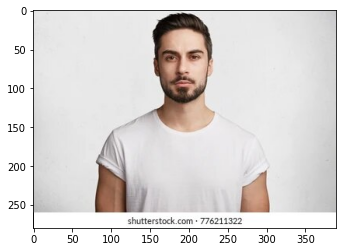